In [104]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import entropy as cluster_entropy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
banana = pd.read_csv("banana  (with class label).csv")
banana

,x,y,class
0,0.228,0.559,1
1,0.216,0.528,1
2,0.221,0.552,1
3,0.215,0.538,1
4,0.224,0.548,1
...,...,...,...
4806,0.507,0.269,2
4807,0.526,0.237,2
4808,0.513,0.233,2
4809,0.506,0.221,2


In [106]:
banana.apply(lambda x:np.sum(x==' '))

x        0
y        0
class    0
dtype: int64

In [107]:
X = banana.drop(labels=['class'],axis=1)
banana_class = banana['class'].values

In [108]:
X

,x,y
0,0.228,0.559
1,0.216,0.528
2,0.221,0.552
3,0.215,0.538
4,0.224,0.548
...,...,...
4806,0.507,0.269
4807,0.526,0.237
4808,0.513,0.233
4809,0.506,0.221


In [109]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
x_scaled = scaler.transform(X)
X = pd.DataFrame(x_scaled,columns=X.columns)
X

,x,y
0,0.066667,0.519004
1,0.049275,0.478375
2,0.056522,0.509830
3,0.047826,0.491481
4,0.060870,0.504587
...,...,...
4806,0.471014,0.138925
4807,0.498551,0.096986
4808,0.479710,0.091743
4809,0.469565,0.076016


In [111]:
start = time.time()

Agg = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = Agg.fit_predict(X)

end = time.time()
print('運行時間 =',end-start)

運行時間 = 0.5128321647644043


In [112]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [113]:
y_pred = np.array([1 if label == 1 else 2 for label in y_pred])
y_pred

array([1, 1, 1, ..., 2, 2, 2])

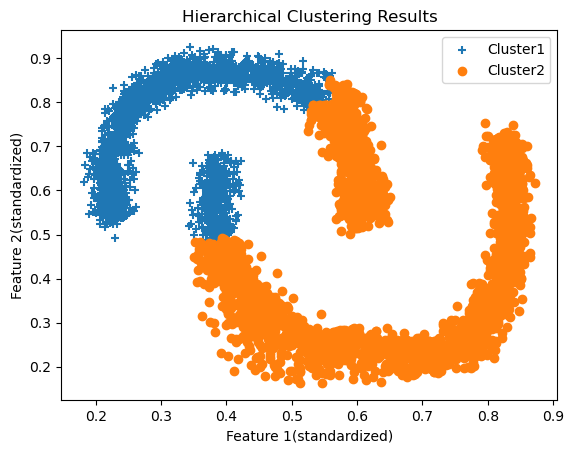

In [121]:
banana['cluster'] = y_pred
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1(standardized)')
plt.ylabel('Feature 2(standardized)')
plt.scatter(banana[banana['cluster'] == 1]['x'], banana[banana['cluster'] == 1]['y'], marker='+', label='Cluster1')
plt.scatter(banana[banana['cluster'] == 2]['x'], banana[banana['cluster'] == 2]['y'], marker='o', label='Cluster2')
plt.legend()
plt.show()

In [115]:
cluster_centers = np.array([banana[y_pred == i].mean(axis=0) for i in range(1,3)])
distances_squared = np.sum((banana - cluster_centers[y_pred-1]) ** 2, axis=1)
sse = np.sum(distances_squared)
print('SSE =',sse)

SSE = 1086.1215373599655


In [116]:
acc = accuracy_score(banana_class, y_pred)
print('Accuracy =',acc)

Accuracy = 0.7522344626896695


In [117]:
entropy = cluster_entropy(y_pred)
print('Entropy =',entropy)

Entropy = 0.6863816117124883
